<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Clustering_29_01_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering exam 29/01/2020

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid,GridSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder, OrdinalEncoder
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import confusion_matrix
random_state = 42

## 1. load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and decide which pair of columns is most interesting for a 2d scatterplot, ad produce the scatterplot

In [38]:
data = pd.read_csv("seeds_dataset.txt",sep = "\t", header = None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


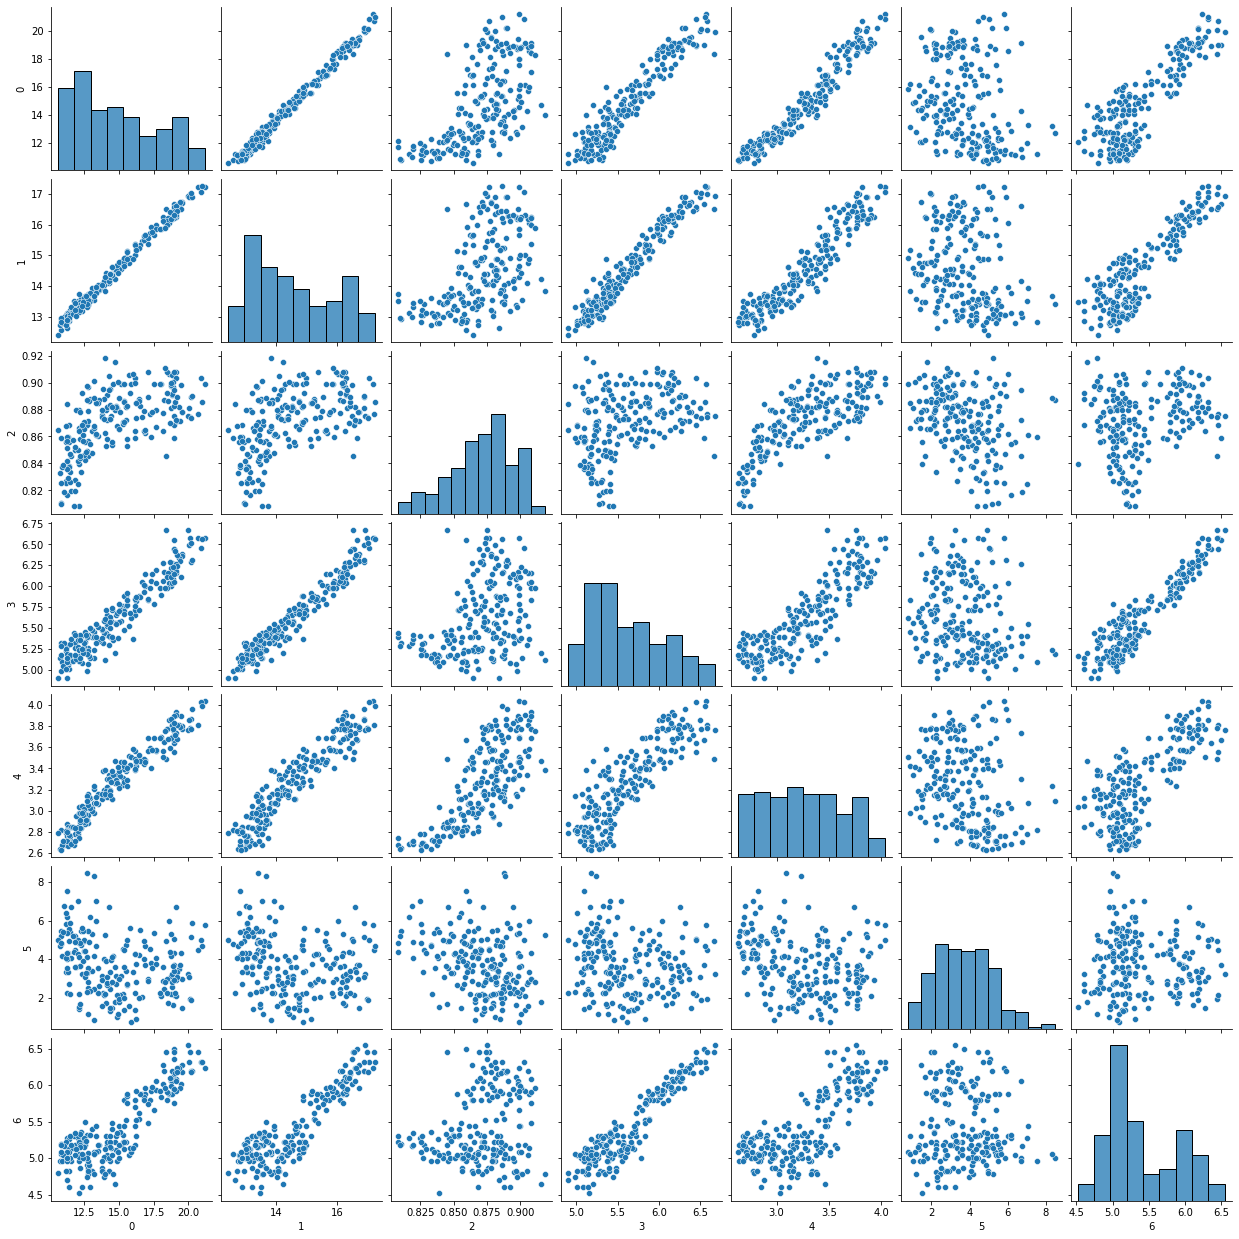

In [39]:
X = data.drop(7,axis =1)
y = data[7]
sns.pairplot(X)

The most interesting couple is the couple 3 and 6 because they are the most separeted ones

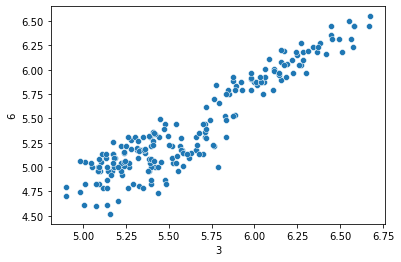

In [40]:
sns.scatterplot(x = 3,y = 6, data = X)

## 2. Find the best clustering scheme for X with a method of your choice, plot ssd and global silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s)

Consider carefully the number of clusters, simple optimisation of the silhouette will not be 
enough, consider also the elbow plot and decide visually the best number of clusters

In [41]:
n_clusters = range(2,11)

silhouette_scores = []

inertia = []

for cluster in  n_clusters:

  km = KMeans(n_clusters = cluster, random_state = random_state)

  y_km = km.fit_predict(X)

  silhouette_scores.append(silhouette_score(X,y_km))
  
  inertia.append(km.inertia_)

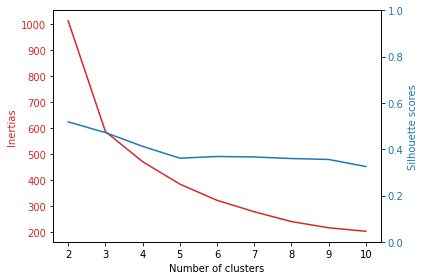

In [42]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    
two_plots(x=n_clusters, y1=inertia, y2=silhouette_scores
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

The best number of clusters is equal to 3.

## 3.  fit the clustering scheme to y_km, then produce the confusion matrix comparing y and y_km with sklearn.metrics.confusion_matrix, the resulting confusion matrix must be "sorted" using the function max_diag provided below, producing the final confusion matrix cm_km

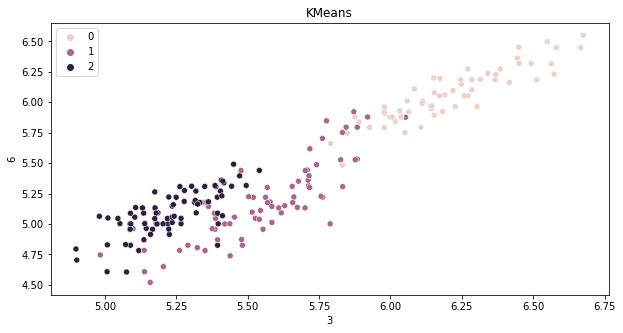

In [43]:
k = 3

km_b = KMeans(n_clusters = k , random_state = random_state)

y_km_b = km_b.fit_predict(X)


plt.figure(figsize= [10,5])
plt.title("KMeans")
sns.scatterplot(x= X[3],y=X[6],hue = y_km_b);
plt.show()

In [44]:
cfm = confusion_matrix(y,y_km_b,)
cfm

array([[ 1, 60,  9],
       [60, 10,  0],
       [ 0,  2, 68]])

In [45]:
from max_diag import max_diag
cm_km = max_diag(cfm)
print(cm_km)


[[60.  1.  9.]
 [10. 60.  0.]
 [ 2.  0. 68.]]


##  4. in a comment explain why function max_diag is useful

The function max diag is usefull because reorder a confusion matrix when the two label vectors have different codings

## 5.  compute the accuracy a_km of y_km versus y as the ratio the sum of the main diagonal of cm_km and the number of samples in X

In [46]:
accuracy = cm_km.diagonal().sum()/np.sum(cm_km)* 100
print("The accuracy is: ",accuracy.round(2),"%")

The accuracy is:  89.52 %


## 6.  rescale X using sklearn.preprocessing.MinMaxScaler, producing the scaled dataset X_mms

In [47]:
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
X_mms = pd.DataFrame(X_mms, columns=X.columns)
X_mms

,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


## 7.  repeat point 3 and 5 above, fitting X_mms to y_km_mms and producing the confusion matrix cm_km_mms reordered with max_diag and the accuracy a_km_mms as above

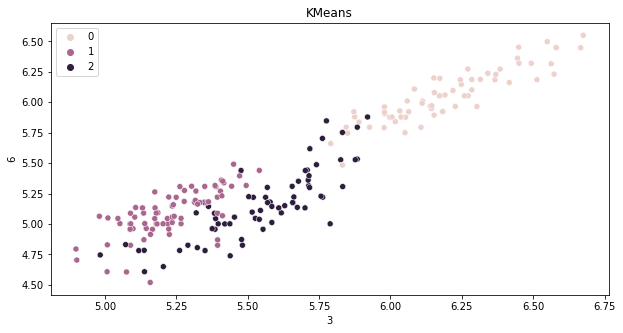

In [48]:
k = 3

km_b = KMeans(n_clusters = k , random_state = random_state)

y_km_b_mms = km_b.fit_predict(X_mms)


plt.figure(figsize= [10,5])
plt.title("KMeans")
sns.scatterplot(x= X[3],y=X[6],hue = y_km_b_mms);
plt.show()

In [49]:
cfm_mms = confusion_matrix(y,y_km_b_mms)
cfm_mms

array([[ 2, 10, 58],
       [62,  0,  8],
       [ 0, 67,  3]])

In [50]:
from max_diag import max_diag
cm_km = max_diag(cfm)
print(cm_km)

[[60.  1.  9.]
 [10. 60.  0.]
 [ 2.  0. 68.]]


In [51]:
accuracy = cm_km.diagonal().sum()/np.sum(cm_km)* 100
print("The accuracy is: ",accuracy.round(2),"%")

The accuracy is:  89.52 %
